# Plotting of cool 3D E-field

(-0.1, 0.1)

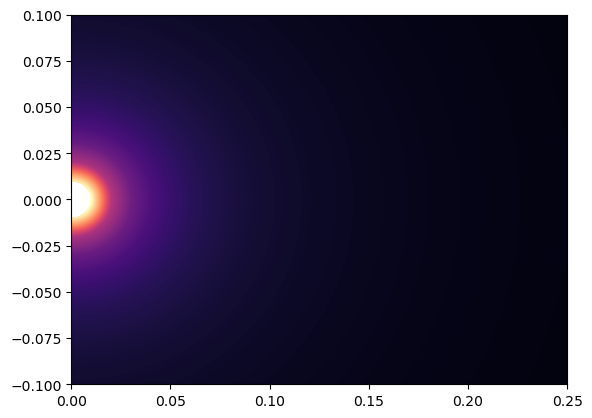

In [13]:
def e_field(r, theta, phi):
    k = 1 / 4*np.pi*constants.epsilon_0
    const = k / r

    Er = const*3
    Etheta = const*2*np.sin(theta)*np.cos(theta)*np.sin(phi)
    Ephi = const*np.sin(theta)*np.cos(phi)
    
    E_mag = np.sqrt(Er**2 + Etheta**2 + Ephi**2)

    return E_mag

r = np.linspace(0.01, 1, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

R, Theta, Phi = np.meshgrid(r, theta, phi)

E_field = e_field(R, Theta, Phi)
E_field = E_field[:, :, 0]

X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

lim = 0.1
plt.contourf(X[:, :, 0], Z[:, :, 0], E_field, levels = 1000, cmap = 'magma')
plt.xlim(0, 2.5*lim)
plt.ylim(-lim,lim)

# Testing only loop calculation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants

def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

def dipole_magnetic_field(r, theta, R, I):
    # Have to add the calculation of the magnetic field due to an induced emf. To calculate emf we can use (emf = -M*dI_1/dt) and give the loops some internal resistance in order to calculate
    # emf = I_2R_2. Solving this for I_2 we get the induced current due to the change in current of the other loop. Now that we have this current we can add it to the internal current that it may have
    # in order to get the total current flowing through the loop. We use this current then to find the magnetic field. 
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - 2.5)**2))**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)
    
    return Br, Btheta

# Initializing values
lim = 5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, 2*np.pi, 100)  # Polar angle
ts = np.linspace(0,10,3) # Time array
ms = [] # Magnetic moment list for dipole
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 50 # Frequency of current
omega = 2*constants.pi*f # Angular frequency of current
I0 = 2 # Peak current
Is = [] # Empty current list for plotting
j = 0 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 0.4e-2 # Radius of little loop of wire
z = (1/2)*lim # Separation between loops
res = 1

'''
M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2))
emf = -M*(I/ts)
I_induced = emf / res
I_total = I0 + I_induced
'''

Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, R=b, I=I0)
B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

Br_loop2, Btheta_loop2 = dipole_magnetic_field(R, Theta, R=a, I=I0)
B_mag_loop2 = np.sqrt(Br_loop2**2 + Btheta_loop2**2)

# Convert polar coordinates to Cartesian coordinates
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

vmin = 0
vmax = 1e-9

# Plot magnetic field using contour plot
plt.figure(figsize=(8, 6))
loop1 = plt.contourf(X, Y, B_mag_loop, levels=200, cmap='magma', extend='both', vmax=vmax, vmin=vmin)
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Loop 1 Magnetic Field with R = b')
plt.colorbar(ScalarMappable(norm=loop1.norm, cmap=loop1.cmap))
plt.show()

plt.figure(figsize=(8, 6))
loop2 = plt.contourf(X, Y, B_mag_loop2, levels=200, cmap='magma', extend='both')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Loop 2 Magnetic Field with dipole appoximation')
plt.colorbar(ScalarMappable(norm=loop2.norm, cmap=loop2.cmap))
plt.show()

plt.figure(figsize=(8, 6))
loop3 = plt.contourf(X, Y, B_mag_loop2 + B_mag_loop, levels=200, cmap='magma', extend='both')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Magnetic Field Sum')
plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))
plt.show()

# Non - Moving Simulation with Contour Plotting only

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants
import os
 
def dipole_magnetic_field(r, theta, R, I, shift):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - shift)**2))**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)
    
    return Br, Btheta

def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

# Initializing values
lim = 2.5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, 2*np.pi, 100)  # Polar angle
ms = [] # Magnetic moment list for dipole
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 0.25 # Frequency of current
fps = 25
duration = 10
dt = fps*duration
ts = np.linspace(0,duration,dt) # Time array
omega = 2*constants.pi*f # Angular frequency of current
I0 = 3 # Peak current
Is_a = [] # Empty current list for plotting
Is_b = [] # Empty current list for plotting
emfs_a = []
emfs_b = []
zs = []
B_dipole_list = []
B_loop_list = []
j = 1 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 1 # Radius of little loop of wire
z0 = 1 # Separation between loops
resistance_a = 1e-4
resistance_b = 10
I_old_b = 0
I_old_a = 0

for t in ts:
    I = I0*np.sin(omega*t) # Flowing current in loop B
    #z = (1/40)*t**2 + z0 # Separation between two at time t
    z = z0
    M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2)) # Mutual Inductance as a function of z
    emf_a = -M*((I - I_old_b)/dt) # Induced emf in Loop A and B
    I_induced_a = emf_a / resistance_a # Induced current in Loop A due to change in current in Loop B
    emf_b = -M*((I_induced_a - I_old_a)/dt)
    I_induced_b = emf_b / resistance_b # Induced current in loop B due to change in current in loop A
    I_total_b = I + I_induced_b

    Is_a.append(I_induced_a)
    Is_b.append(I_total_b)
    emfs_a.append(emf_a)
    emfs_b.append(emf_b)
    zs.append(z)

    Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, R=b, I=I_total_b)
    B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

    #B_loop_list.append(B_mag_loop[1][1])

    Br_dipole, Btheta_dipole = dipole_magnetic_field(R, Theta, R=a, I=I_induced_a, shift=z)
    B_mag_dipole = np.sqrt(Br_dipole**2 + Btheta_dipole**2)

    #B_dipole_list.append(B_mag_dipole[1][1])

    I_old_b = I_total_b
    I_old_a = I_induced_a

    B_total = B_mag_loop + B_mag_dipole

    # Convert polar coordinates to Cartesian coordinates
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    vmax = 1.4e-7
    vmin = 0

    print(f'Dipole Mag at {round(t, 3)}: {B_mag_dipole[50][50]}')
    print(f'Loop Mag at {round(t, 3)}: {B_mag_loop[50][50]}')
    print(f'Mag at {round(t, 3)}: {B_total[50][50]}    ')
    print(' ')
    
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, B_total, levels=200, cmap='magma', extend='both', vmin=vmin, vmax=vmax)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title(f'Magnetic Field Sum at t = {round(t,3)}')
    plt.colorbar(ScalarMappable(norm=contour.norm, cmap=contour.cmap))
    plt.savefig(f'../figures/final_animation/{j}.png')
    plt.close()

    j = j + 1


# Main Simulation and Plotting for 1D and Contour

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants
 
# Caculates the magnetic field everywhere for a dipole given a radius R, current I, and shift in its position on the y-axis
def dipole_magnetic_field(r, theta, R, I, shift):
    s = r*np.sin(theta)
    z = r*np.cos(theta)
    zp = z-shift
    rp = np.sqrt(s**2+zp**2)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*r**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)

 #   x = r*np.cos(theta)
  #  y = r*np.sin(theta)
   # area = np.pi*R**2
    #m = I*area
    #const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - shift)**2))**3)
    #Br = const*2*np.cos(theta)
    #Btheta = const*np.sin(theta)
    
    return Br, Btheta

# Calculates the magnetic field everywhere for a loop of wire given its radius R and flowing current I 
def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

# Initializing values
lim = 2.5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, np.pi, 100)  # Polar angle
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 0.5 # Frequency of current in loop
fps = 100#25 # Frame rate of final video
duration = 2#10 # Duration of video
dt = fps*duration # Calculating dt to ensure proper FPS and Duration of video
ts = np.linspace(0,duration,dt) # Time array
omega = 2*constants.pi*f # Angular frequency of current
I0 = 3 # Peak Current divided by 2 since the current is shifted to only be positive

# Empty arrays for plotting
Is_a = np.full(dt, np.nan) 
Is_b = np.full(dt, np.nan) 
emfs_a = np.full(dt, np.nan)
emfs_b = np.full(dt, np.nan)
zs = np.full(dt, np.nan)
B_dipole_list = np.full(dt, np.nan)
B_loop_list = np.full(dt, np.nan)
B_total_list = np.full(dt, np.nan)

j = 0 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 1e-4 # Radius of dipole
z0 = lim # Initial separation between loops
resistance_a = 1e-20 # Resistance in dipole
resistance_b = 10 # Resistance in Loop
I_old_b = 3 # Initalizing the old current for differentiating
I_old_a = 0 

# Main Loop
for t in ts:
    I = I0*np.sin(omega*t) + I0 # Flowing current in loop B
    #z = 1
    z = 0.5*t# - z0 # Separation between dipole and loop at time t
    M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2)) # Mutual Inductance as a function of z
    emf_a = -M*(I0*omega*np.cos(omega*t)) # Induced emf in Loop A and B
    #emf_a = -M*((I - I_old_b)/dt) # Induced emf in Loop A and B
    I_induced_a = emf_a / resistance_a # Induced current in Loop A due to change in current in Loop B
    #emf_b = -M*((I_induced_a - I_old_a)/dt) # Induced Current in Loop due to the changing flux in the dipole
    #I_induced_b = emf_b / resistance_b # Induced current in loop B due to change in current in loop A
    I_total_b = I #+ I_induced_b # Adding the Induced Current to the Flowing Current

    # Updating arrays for 1D plot for current time step
    Is_a[j] = I_induced_a
    Is_b[j] = I_total_b
    emfs_a[j] = emf_a
    emfs_b[j] = emf_b
    zs[j] = z

    # Calculating the magnetic field everywhere for the Loop
    Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, b, I_total_b)
    B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

    # Calculating the magnetic field everywhere for the dipole
    Br_dipole, Btheta_dipole = dipole_magnetic_field(R, Theta, a, I_induced_a, z)
    B_mag_dipole = np.sqrt(Br_dipole**2 + Btheta_dipole**2)

    # Setting old current values for next time step
    I_old_b = I_total_b
    I_old_a = I_induced_a

    # Adding the B-field of dipole and loop for plotting on contour plot
    B_total = B_mag_loop + B_mag_dipole

    # Updating the B-field arrays for 1D plot
    B_loop_list[j] = B_mag_loop.max()
    B_dipole_list[j] = B_mag_dipole.max()
    B_total_list[j] = B_total.max()

    # Convert polar coordinates to Cartesian coordinates
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    # Setting bounds for the color bar on contour plot
    vmax = 3e-7
    vmin = 0
    ''''

    print(f'Flowing Current at {round(t, 3)}: {I}')
    print(f'Induced Current in Dipole at {round(t, 3)}: {I_induced_a}')
    print(f'Dipole Mag at {round(t, 3)}: {B_mag_dipole.max()}')
    print(f'Loop Mag at {round(t, 3)}: {B_mag_loop.max()}')
    print(f'Mag at {round(t, 3)}: {B_total.max()}    ')
    print(' ')

    # Plotting contour of the magnetic field sum of the dipole and loop
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, B_total, levels=200, cmap='magma', extend='both', vmin=vmin, vmax=vmax)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title(f'Magnetic Field Sum at t = {round(t,3)}')
    plt.colorbar(ScalarMappable(norm=contour.norm, cmap=contour.cmap))
    plt.savefig(f'../figures/final_animation/moving/contour/{j}.png')
    plt.close()
    '''
    # Plotting 1 Dimensional values on subplot
    fig, axs = plt.subplots(5, figsize = (10,15))
    plt.setp(axs, xlim=(0,duration))
    axs[0].plot(ts, Is_b) # t vs. Total Current in Loop
    axs[0].set_title("Flowing Current Through Loop")
    axs[1].plot(ts, emfs_a) # t vs. Induced current in dipole
    axs[1].set_title('Induced EMF in Dipole')
    axs[2].plot(ts, B_loop_list) # t vs. Max B-field at current time step for loop
    axs[2].set_title('Maximum Magnitude of B in Loop')
    axs[3].plot(ts, B_dipole_list) # t vs. Max B-field at current time step for dipole
    axs[3].set_title('Maximum Magnitude of B in Dipole')
    axs[4].plot(ts, zs) # t vs. Separation between the two
    axs[4].set_title('Separation between Dipole and Loop')
    plt.savefig(f'../figures/final_animation/moving/{j}.png')
    plt.close()

    j = j + 1
